# Project: Investigate a Movie Dataset (TMDb Movie Dataset)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be invastigating a movie dataset named "TMDb Movie Data Set". This dataset has 10,000 movie names and their metadata associated with it. We would be imposing questions on the features of the dataset and then we would be exploring the dataset for the answers. We will be following the complete data analysis process here. We will assess our dataset followed by cleaning, exploration, visualization and conclusion.

We would be exploring the dataset for the following questions:

1. How does budget distribution look like and what is the mean and max of this feature?
2. How does revenue distribution look like for this dataset and what is the mean and max of this feature?
3. How does release year distribution look like?
4. Which genre was the most popular among all?
5. Which actor/actress was casted maximum number of times?
6. Which director has directed maximum number of movies?
7. How did the revenue of movies go with the budget?
8. Which genre was in the genre list who appeared maximum number of times (year wise)?
9. How many movies fall under highly rated movies?
10. What are the characteristics of highly rated movies?

In [43]:
#Importing data

import pandas as pd
import matplotlib as plt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling:


### General Properties

In [44]:
# Loading the data and printing few lines
df=pd.read_csv('tmdb-movies.csv')

#To display all the columns names
pd.options.display.max_columns=None

df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


****

In [45]:
#Checking data types of features, features with missing data and naming convention of coulumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>**Inference (1):-**  
>*    `release_ date` feature is in 'string' format. It can be changed to 'datatime' format, otherwise data types of all remaining features seem okay.
>*    Features with missing data are: `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `genres`, `production_companies`.
>*    Feature names are in lowercase and wordsare separated by underscore. So they are okay.

***

In [46]:
#Checking for duplicate rows
sum(df.duplicated())

1

>**Inference (2):-**  
>*     Number of duplicated rows preseted in the data set is 1.


<br>

<br>

### Data Cleaning 

We have found 3 issues in our dataset by our inferences. They are:
1. One duplicated row.
2. Features with missing data are present.
3. Datatype of `release_date` feature is string.

We would be dealing with these issues one by one. But before doing it, we would want to drop all the features or columns which won't bring any help to us in exploring answers to questions which have been introduced in the 'Introduction' part of the report. This will enable us to play with data which is important to us.

#### 1) Trimming Extraneous Columns

In [47]:
#Before Trimming Extraneous columns.
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [48]:
#Now Trimming Extraneous columns.
#Dropping columns: Homepage, overview, tagline,keywords
df.drop(labels=['imdb_id','popularity','homepage','tagline','keywords','overview','runtime','production_companies','vote_count','budget_adj','revenue_adj'],axis=1,inplace=True)


In [49]:

#After Trimming Extraneous columns.
df.columns

Index(['id', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'genres', 'release_date', 'vote_average', 'release_year'],
      dtype='object')

<br>

#### 2) Droping Duplicate Rows

In [50]:
#Drop all duplicates
df.drop_duplicates(inplace=True)

In [51]:
#Check all duplicates
sum(df.duplicated())

0

<br>

#### 3) Fixing Columns With Null Values Data

In [52]:
#Now Checking count of null values present in the columns
col_wth_null_values=df.columns[df.isnull().any()]
df[col_wth_null_values].isnull().sum()

cast        76
director    44
genres      23
dtype: int64

In [53]:
#droping all the rows containing null values
df.dropna(axis=0,inplace=True)


In [54]:
#Now Checking if any column still have null values
df.isnull().sum().any()

False

<Br>

#### 4) Changing the Data Type of 'release_date' Column

In [55]:
#Converting format to datetime
df.release_date=pd.to_datetime(df['release_date'])

In [56]:
#Checking if the change is reflected or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 10 columns):
id                10731 non-null int64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
genres            10731 non-null object
release_date      10731 non-null datetime64[ns]
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 922.2+ KB


<br>

### <a id='eda'></a>
## Exploratory Data Analysis
`

### 1) How does budget distribution look like and what are the properties of it ?

Text(0.5, 1.0, 'Budget vs Frequency')

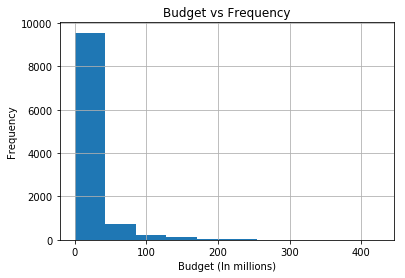

In [57]:
# Plotting a bar chart for the budget
#Dividing it by 10^6 so money can be shown in millon dollars

budget=df['budget']/1000000
budget.hist();
plt.xlabel("Budget (In millions)")
plt.ylabel("Frequency")
plt.title("Budget vs Frequency")

In [58]:
#Generating properties for the feature.
budget.describe()

count    10731.000000
mean        14.803646
std         31.064556
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max        425.000000
Name: budget, dtype: float64

>**Conclusion:-**
>*    Mean value for this feature is 14.8 million dollors.
>*    The highest budget for a movie was 425 millions dollors and lowest was 0 dollars.


<br>

### 2) How does revenue distribution look like for this dataset and what are the properties of it ?

Text(0.5, 1.0, 'Revenue vs Frequency')

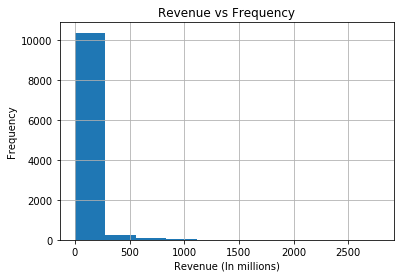

In [59]:
# Plotting a bar chart for the revenue.
#Dividing it by 10^6 so money can be shown in millon dollars

revenue=df['revenue']/1000000
revenue.hist();
plt.xlabel("Revenue (In millions)")
plt.ylabel("Frequency")
plt.title("Revenue vs Frequency")

In [60]:
#Generating properties for the feature.
revenue.describe()

count    10731.000000
mean        40.319888
std        117.652421
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max       2781.505847
Name: revenue, dtype: float64

>**Conclusion:-**
>*    Mean value for this feature is 40.31 million dollors.
>*    The highest revenue for a movie was 2781.50 millions dollors and the lowest remain 0.


<br>

### 3) How does release year distribution look like?

Text(0.5, 1.0, 'Year vs Frequency')

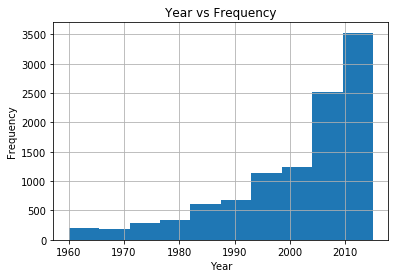

In [61]:
df.release_year.hist();
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Year vs Frequency")

>**Conclusion**
>* The plot is left skewed. With each decade, the count of total number of movies got released, incremented.

<br>

### 4) Which genre was the most popular among all genres?

In [62]:
#To answer this question, we need to have a look at the genre feature of the dataset. We can see that each 
#movie has multiple genres and they are separated by "|". In order to answer this question, 
#we need to seperate each genre from others. we will save them in a list and then make a dataframe ofit. 

#Creating a dataframe for all the values of genres

genres_col=df.genres
genres_list=[]
for x in genres_col:
    list1=x.split('|')
    for genre in list1:
        genres_list.append(genre)
        

genres_df=pd.DataFrame(genres_list,columns=['genres'])

In [63]:
#Let's see how it looks like.
genres_df.head(10)

,genres
0,Action
1,Adventure
2,Science Fiction
3,Thriller
4,Action
5,Adventure
6,Science Fiction
7,Thriller
8,Adventure
9,Science Fiction


In [64]:
#Now counting the total number of unique genres 
genres_df.genres.nunique()

20

In [65]:
#Now counting how many times a genre has appeared
genres_df['genres'].value_counts()

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres, dtype: int64

Text(0.5, 1.0, 'Popularity of Genres')

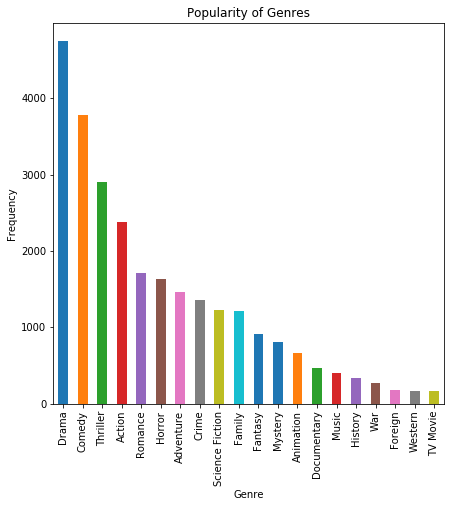

In [66]:

#Now plotting a bar chart 
genres_df['genres'].value_counts().plot(kind='bar',figsize=(7,7));
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Popularity of Genres")

>**Conclusion:**
>1. There are total 20 genres. Among 20 genres, "Drama" was the genre which was present maximum number of times in genre lists associated with movies.
>2. Top 5 genres in decending order were: Drama, Comedy, Thriller, Action and Romance.
>3. "Foreign" genre was the least preffered genre among all.


<br>

### 5) Which actor/actress was casted maximum number of times?

In [67]:
#For the cast featur of the dataset, there are multiple pipeline seperated values present. 
#We will be handling this question in a same way as we handled the previous question.

#Creating a data set for all the entries present in the cast feature.

casts_col=df.cast
casts_list=[]
for x in casts_col:
    list1=x.split('|')
    for cast in list1:
        casts_list.append(cast)
        

casts_df=pd.DataFrame(casts_list,columns=['cast'])

In [68]:
#Let's see how it looks like.
casts_df.head()

,cast
0,Chris Pratt
1,Bryce Dallas Howard
2,Irrfan Khan
3,Vincent D'Onofrio
4,Nick Robinson


In [69]:
#Now counting the total number of unique actors
casts_df.cast.nunique()

18930

In [70]:
#Now counting how many times an actor appeared in the column and then using index to get the first result
sol=casts_df['cast'].value_counts();
sol.iloc[0:1]

Robert De Niro    72
Name: cast, dtype: int64

>**Conclusion:-**
*    18,930 unique people were casted. Among them "Robert De Niro" was casted maximum number of times i.e 72.


<br>

### 6) Which director has directed maximum number of movies?


In [71]:
df.director.value_counts().iloc[0:1]

Woody Allen    45
Name: director, dtype: int64

>**Conclusion:-**
*    Woody Allen has directed maximum number of movies.


<br>

### 7) How did the revenue of movies go with the budget?

Text(0.5, 1.0, 'Budget vs Revenue')

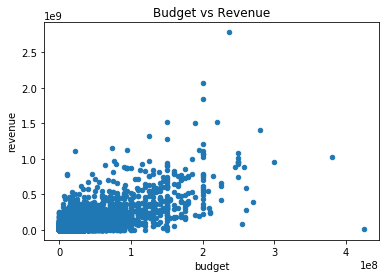

In [72]:
df.plot(x='budget',y='revenue',kind='scatter')
plt.title("Budget vs Revenue")

>**Conclusion**
>*   It can be seen that as budget is growing revenue is increasing.


<br>

### 8) Which genre was in the genre list who appeared maximum number of times (year wise)?

In [73]:
df1=df
df2=df.genres.apply(lambda x: x.split('|')).apply(pd.Series)

In [74]:
new_data_set= df1.merge(df2,left_index=True, right_index=True).drop(['genres'],axis=1)\
.melt(id_vars=['id','budget', 'revenue', 'original_title', 'cast',
       'director','release_date','vote_average', 'release_year'],value_name='genre').dropna()


#let's see how it looks like
new_data_set.head()

,id,budget,revenue,original_title,cast,director,release_date,vote_average,release_year,variable,genre
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,2015-06-09,6.5,2015,0,Action
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,2015-05-13,7.1,2015,0,Action
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,2015-03-18,6.3,2015,0,Adventure
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,2015-12-15,7.5,2015,0,Action
4,168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,2015-04-01,7.3,2015,0,Action


In [75]:
res=(new_data_set.groupby('release_year')['genre']).apply(lambda x: x.value_counts().index[0]).reset_index()
res

,release_year,genre
0,1960,Drama
1,1961,Drama
2,1962,Drama
3,1963,Comedy
4,1964,Drama
5,1965,Drama
6,1966,Comedy
7,1967,Comedy
8,1968,Drama
9,1969,Drama


In [76]:
#Counting number of times the genres appeared in result
res.genre.value_counts()

Drama     46
Comedy    10
Name: genre, dtype: int64

>**Conclusion**
>*    `Drama` genre hits the list maximum number of times. i.e. for 46 years (out of 56), this genre appeared maximum times in the genre lists.

<br>

### 9) How many movies fall under highly rated movies?

In [77]:
#Generating properties of 'vote_average' feature.
df.vote_average.describe()

count    10731.000000
mean         5.964710
std          0.930283
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [78]:
#Creating a list consisting edges from the properties 
bin_edges=[1.5,5.4,6.0,6.6,9.2]

In [79]:
#Creating a list consisting labels for edges
bin_lables=['low','medium','moderate','high']

In [80]:
#Assigning lables to the data
rating_cat=pd.cut(df.vote_average,bin_edges,labels=bin_lables)

In [81]:
#Creating one more column with the name 'rating_category' in the dataframe consisting labels
df['rating_category']=rating_cat

In [82]:
#Counting size for each category 
df.groupby('rating_category').size()

rating_category
low         2874
medium      2643
moderate    2716
high        2496
dtype: int64

In [83]:
#Getting proporting of movies under each category
res=df.groupby('rating_category').size()/df.shape[0]
res

rating_category
low         0.267822
medium      0.246296
moderate    0.253098
high        0.232597
dtype: float64

Text(0.5, 1.0, 'Rating vs Proportion')

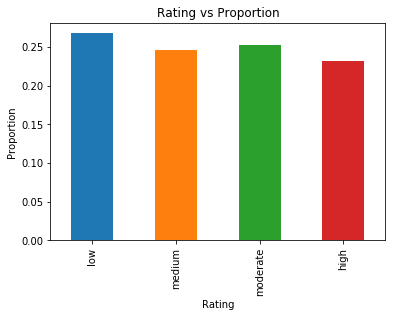

In [84]:
#plotting
res.plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Proportion")
plt.title("Rating vs Proportion")

<br>

>**Conclusion**
>*    Total 2496 movies were produced which had high ratings. It is 23.25% of all the movies made from 1960 t0 2015.
>*    Total 2874 movies were produced which had low ratings. It is 26.78% of all the movies made from 1960 t0 2015.

<br>

### 10) What are the characteristics of highly rated movies?

In [85]:
df[df.rating_category=='high'].describe()

,id,budget,revenue,vote_average,release_year
count,2496.000000,2.496000e+03,2.496000e+03,2496.000000,2496.000000
mean,66063.112179,1.590955e+07,6.650086e+07,7.118630,1999.626202
std,95754.867918,3.515215e+07,1.788003e+08,0.364751,14.371178
min,11.000000,0.000000e+00,0.000000e+00,6.700000,1960.000000
25%,8093.500000,0.000000e+00,0.000000e+00,6.800000,1991.000000
50%,17194.500000,2.750000e+01,2.482610e+05,7.000000,2005.000000
75%,76695.750000,1.500000e+07,4.472426e+07,7.300000,2011.000000
max,417859.000000,3.000000e+08,2.781506e+09,9.200000,2015.000000


>**Conclusion**
>*    Mean budget for highly rated movies is 15.90 million dollars and mean revenue is 66.50 million dollars.
>*    Average rating for all the movies under this category is 7.1
>*    Maximum budget and revenue for a movie under this category are 300 million dollars and 2781 million dollars respectivly.

<a id='conclusions'></a>
## Conclusions

>*     Average budget for a movie remain **14.8** million dollars and avegrage revenue for a movie remain **40.31** million dollars. Maximum budget for a movie was **425** million dollars and maximum revenue a movie generated was **2781.5** million dollars. And we saw, in general, as budget for a movie increases, revenue also increases.
>
>
>*     Movies had been made on **20** different geners all the years. Among 20 genres, "**Drama**" was the genre which was present maximum number of times in genre lists associated with movies.Top 5 genres in decending order were: Drama, Comedy, Thriller, Action and Romance.
>
>
>*     Among them "**Robert De Niro**" was casted maximum number of times i.e. 72 and **Woody Allen** has directed maximum number of movies i.e. 45.
>
>
>*    Mean budget for highly rated movies is **15.90** million dollars and mean revenue is **66.50** million dollars. Average rating for all the movies under this category is **7.1**. Maximum budget and revenue for a movie under this category are **300** million dollars and **2781** million dollars respectivly.Total **2496** movies were produced which had high ratings. It is **23.25**% of all the movies made from 1960 to 2015. Total **2874** movies were produced which had low ratings. It is **26.78**% of all the movies made from 1960 to 2015.
>


>**Limitations:**
>*    We are not sure that the dataset which we are provided is correct and up to date. We can see that there are many rows present where budget and revenue for a movie is 0. This seems unusual. Although we have taken those movies into consideration for the analysis but it makes our finding about budget and revenue undependable.
>
>
>*   We also had to delete all the rows where columns values were null. This also makes the result unreliable due to not considering those movies into the analysis.